In [30]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [31]:
weather = pd.read_csv('../Final_Data/London_weather_data_2011_2014.csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'Datetime', u'Dew_Point_F', u'Humidity',
       u'Temperature_F', u'Wind_Speed_MPH'],
      dtype='object')

In [32]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [33]:
weather.head()

,Unnamed: 0,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH
2011-11-01 01:00:00,0,2011-11-01 01:00:00,51.8,88.0,55.4,6.9
2011-11-01 02:00:00,1,2011-11-01 02:00:00,53.6,94.0,55.4,8.1
2011-11-01 03:00:00,2,2011-11-01 03:00:00,53.6,88.0,57.2,9.2
2011-11-01 04:00:00,3,2011-11-01 04:00:00,53.6,88.0,57.2,9.2
2011-11-01 05:00:00,4,2011-11-01 05:00:00,53.6,88.0,57.2,8.1


In [34]:
# slicing out 2013 data
weather2013 = weather[weather.index.year == 2013]
weather2012 = weather[weather.index.year == 2012]
weather1213 = pd.concat([weather2012, weather2013])

In [35]:
weather1213.head()

,Unnamed: 0,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH
2012-01-01 00:00:00,1460,2012-01-01 00:00:00,50.0,88.0,53.6,13.8
2012-01-01 01:00:00,1461,2012-01-01 01:00:00,50.0,88.0,53.6,15.0
2012-01-01 02:00:00,1462,2012-01-01 02:00:00,51.8,94.0,53.6,13.8
2012-01-01 03:00:00,1463,2012-01-01 03:00:00,51.0,92.0,53.0,13.8
2012-01-01 04:00:00,1464,2012-01-01 04:00:00,50.0,88.0,53.6,10.4


In [36]:
energy2013 = pd.read_csv('../Final_Data/energy_final_2013.csv', parse_dates=[0], infer_datetime_format=True)
energy2013.iloc[:,1:].convert_objects(convert_numeric=True)
energy2013.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [37]:
energy2012 = pd.read_csv('../Final_Data/energy_final_2012.csv', parse_dates=[0], infer_datetime_format=True)
energy2012.iloc[:,1:].convert_objects(convert_numeric=True)
energy2012.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [38]:
energy1213 = pd.concat([energy2012, energy2013])
energy1213.head()

,Unnamed: 0,DateTime,Adversity,Affluent,Comfortable,Overall
0,0,2012-01-01 00:00:00,0.221192,0.268072,0.190114,0.231749
1,1,2012-01-01 01:00:00,0.616456,0.633311,0.355447,0.550101
2,2,2012-01-01 02:00:00,0.483976,0.570036,0.296605,0.466764
3,3,2012-01-01 03:00:00,0.375616,0.489018,0.236228,0.383123
4,4,2012-01-01 04:00:00,0.324936,0.376808,0.206053,0.312892


In [39]:
energy1213.index = pd.DatetimeIndex(energy1213.DateTime)

In [40]:
energy1213.drop(['Unnamed: 0'], axis=1, inplace=True)

In [41]:
energy1213.columns = [['Datetime', 'Low_Income', 'High_Income', 'Middle_Income', 'Overall']]

In [42]:
energy1213.head()

,Datetime,Low_Income,High_Income,Middle_Income,Overall
2012-01-01 00:00:00,2012-01-01 00:00:00,0.221192,0.268072,0.190114,0.231749
2012-01-01 01:00:00,2012-01-01 01:00:00,0.616456,0.633311,0.355447,0.550101
2012-01-01 02:00:00,2012-01-01 02:00:00,0.483976,0.570036,0.296605,0.466764
2012-01-01 03:00:00,2012-01-01 03:00:00,0.375616,0.489018,0.236228,0.383123
2012-01-01 04:00:00,2012-01-01 04:00:00,0.324936,0.376808,0.206053,0.312892


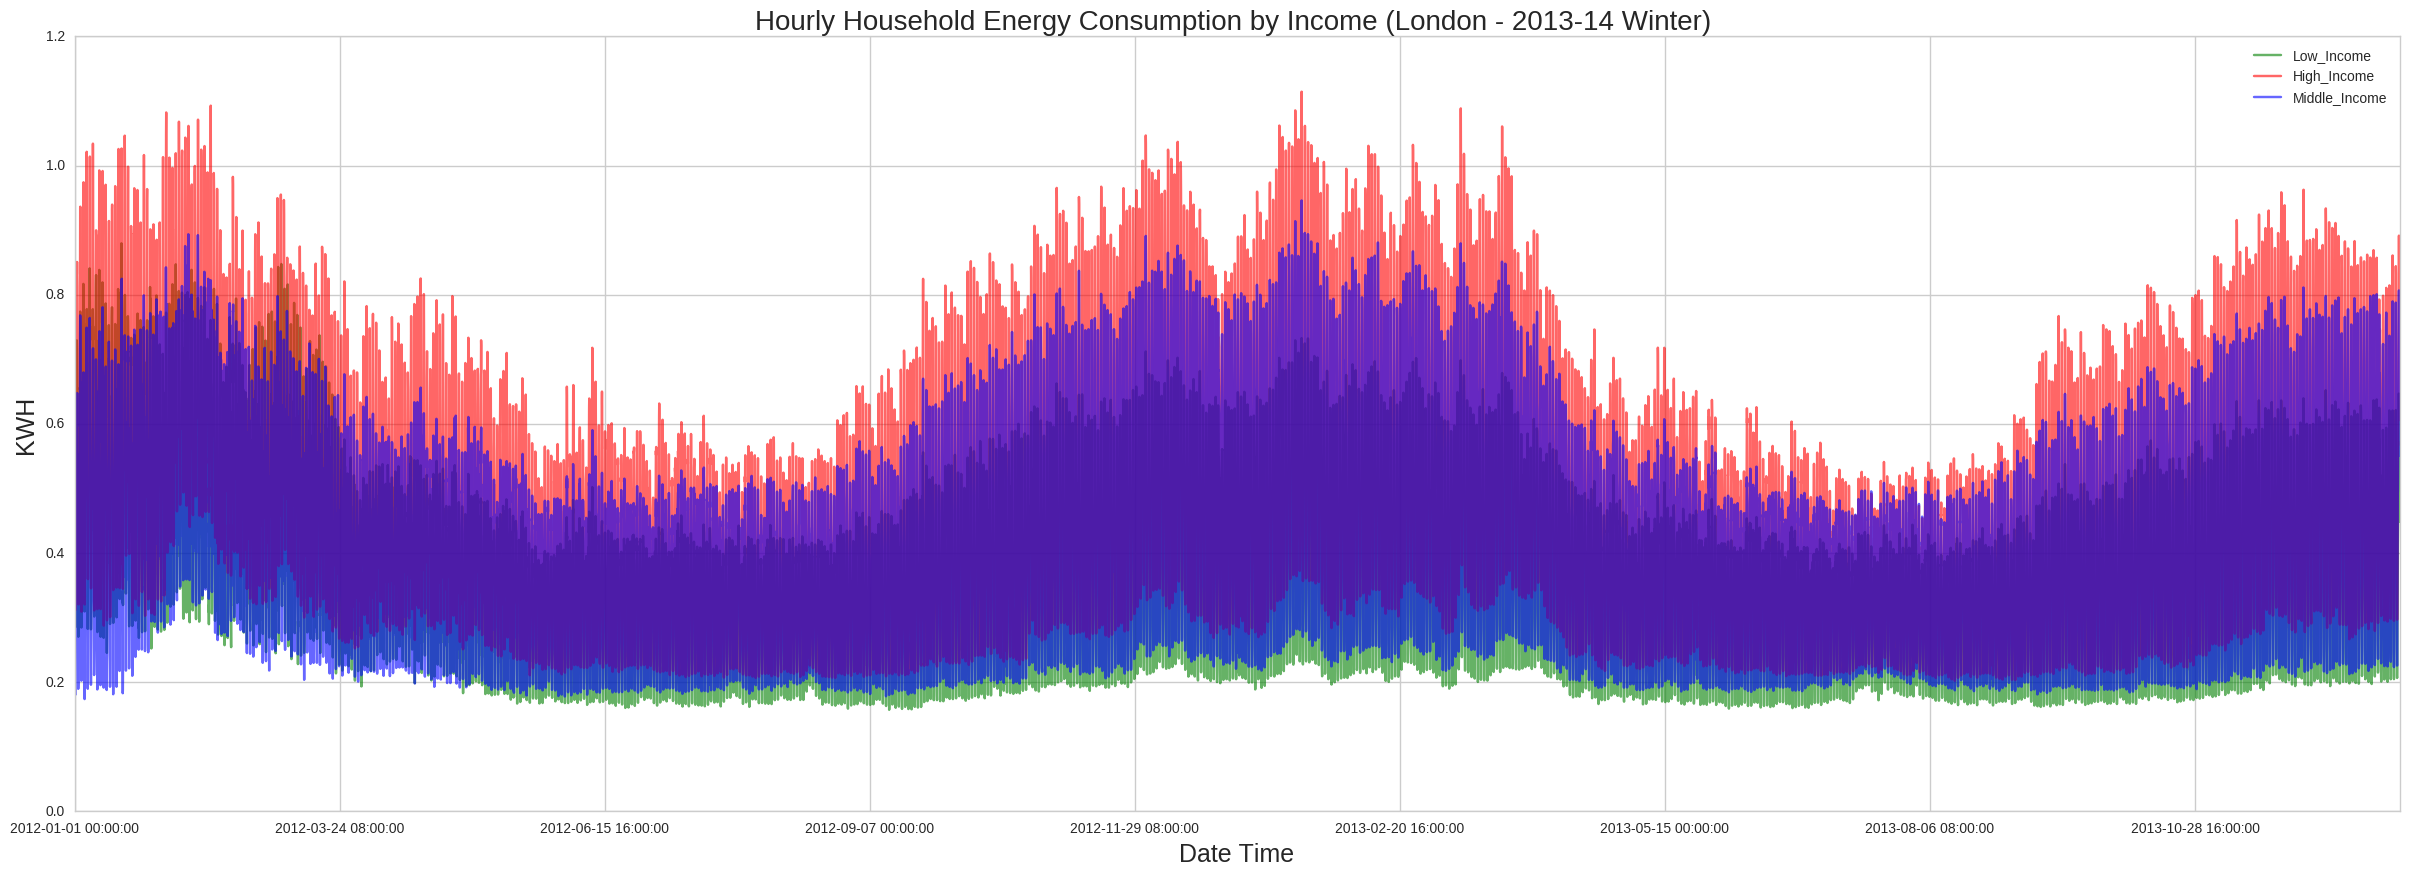

In [43]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy1213.plot(x='Datetime', y='Low_Income', color='Green',alpha=.6, ax=ax)
energy1213.plot(x='Datetime', y='High_Income', color='Red', alpha=.6, ax=ax)
energy1213.plot(x='Datetime', y='Middle_Income', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [44]:
final1213 = pd.merge(weather1213, energy1213, on='Datetime')

In [45]:
final1213.head()

,Unnamed: 0,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH,Low_Income,High_Income,Middle_Income,Overall
0,1460,2012-01-01 00:00:00,50.0,88.0,53.6,13.8,0.221192,0.268072,0.190114,0.231749
1,1461,2012-01-01 01:00:00,50.0,88.0,53.6,15.0,0.616456,0.633311,0.355447,0.550101
2,1462,2012-01-01 02:00:00,51.8,94.0,53.6,13.8,0.483976,0.570036,0.296605,0.466764
3,1463,2012-01-01 03:00:00,51.0,92.0,53.0,13.8,0.375616,0.489018,0.236228,0.383123
4,1464,2012-01-01 04:00:00,50.0,88.0,53.6,10.4,0.324936,0.376808,0.206053,0.312892


In [46]:
data2 = final1213.groupby(['Temperature_F']).mean()
data2.reset_index(inplace=True)
data2.describe()

,Temperature_F,Dew_Point_F,Humidity,Wind_Speed_MPH,Low_Income,High_Income,Middle_Income,Overall
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,56.165657,43.691139,63.500375,8.574301,0.355526,0.461066,0.403562,0.412868
std,20.055699,12.141856,19.974889,2.175110,0.045617,0.086596,0.054952,0.065086
min,19.400000,15.800000,12.000000,1.200000,0.241555,0.338639,0.273886,0.301046
25%,39.100000,34.082063,45.147530,7.756190,0.323271,0.393549,0.365832,0.364478
50%,56.000000,48.365854,70.045455,9.165369,0.337778,0.420763,0.381449,0.378946
75%,73.200000,53.422563,79.461942,9.934031,0.395830,0.541764,0.447996,0.474685
max,91.400000,64.000000,95.000000,14.300000,0.496304,0.645707,0.529608,0.566095


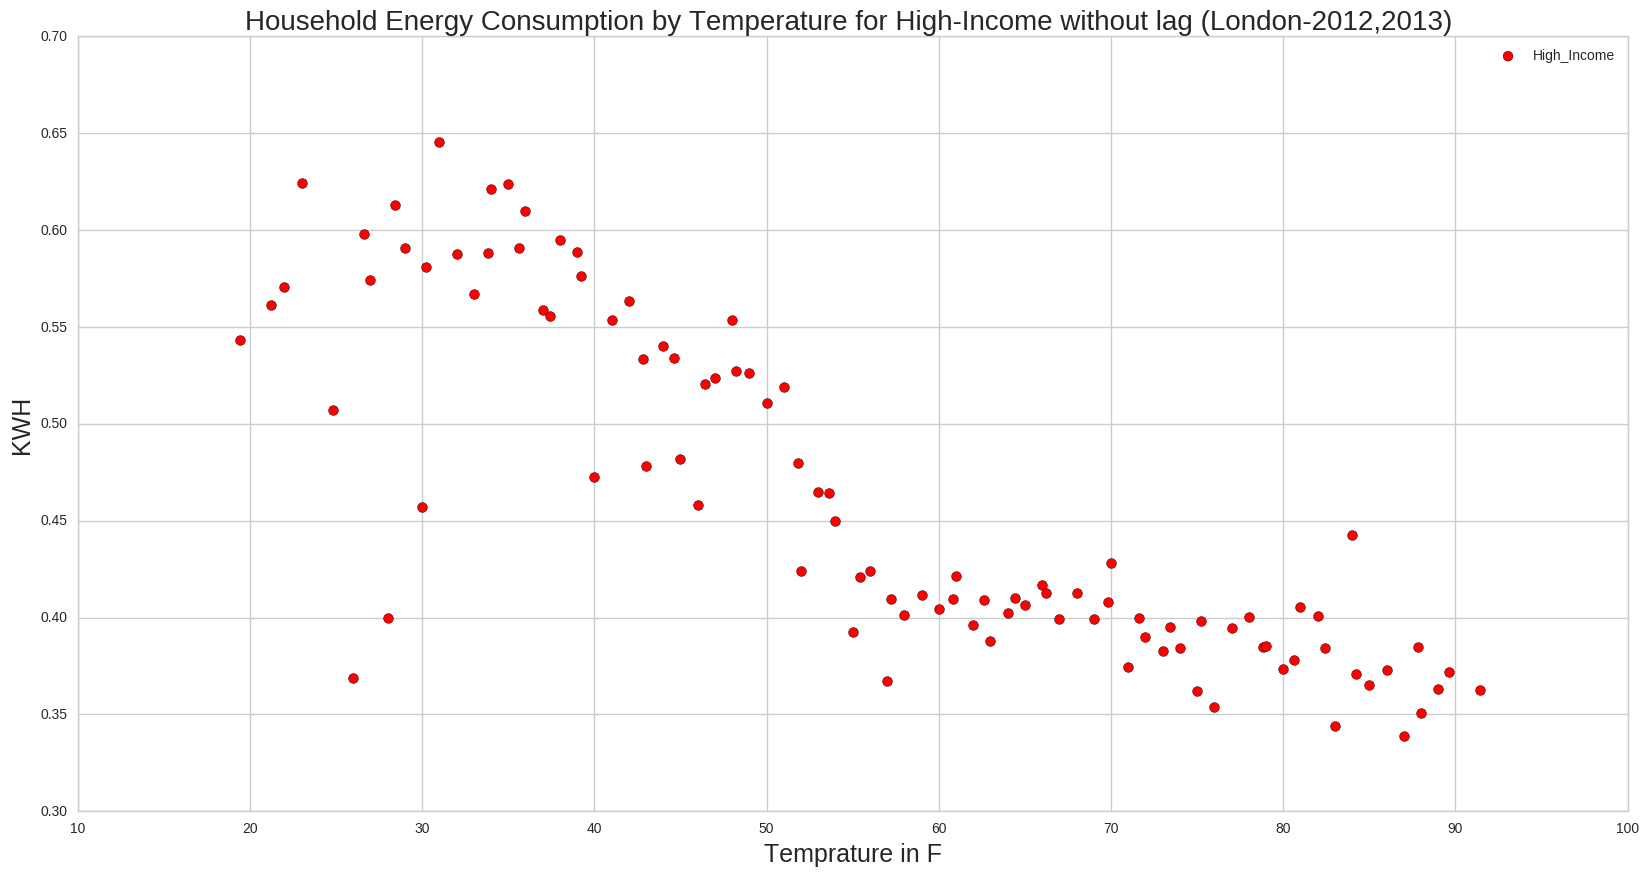

In [47]:
ax1 = pl.figure(figsize=(20,10)).add_subplot(111)

data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='r',s=50, alpha=1, ax=ax1, label='High_Income')
pl.title('Household Energy Consumption by Temperature for High-Income without lag (London-2012,2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()


In [48]:
#defining a dataframe to store r-squared values
lag = np.linspace(0,24,25)
rsqd = pd.DataFrame(lag, columns=['Time_Lag'])
rsqd['1deg_R2'] = np.zeros(25)
rsqd['1deg_adjR2'] = np.zeros(25)
rsqd['2deg_R2'] = np.zeros(25)
rsqd['2deg_adjR2'] = np.zeros(25)
rsqd['3deg_R2'] = np.zeros(25)
rsqd['3deg_adjR2'] = np.zeros(25)
rsqd['LR12'] = np.zeros(25)
rsqd['LR13'] = np.zeros(25)
rsqd.head()

,Time_Lag,1deg_R2,1deg_adjR2,2deg_R2,2deg_adjR2,3deg_R2,3deg_adjR2,LR12,LR13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


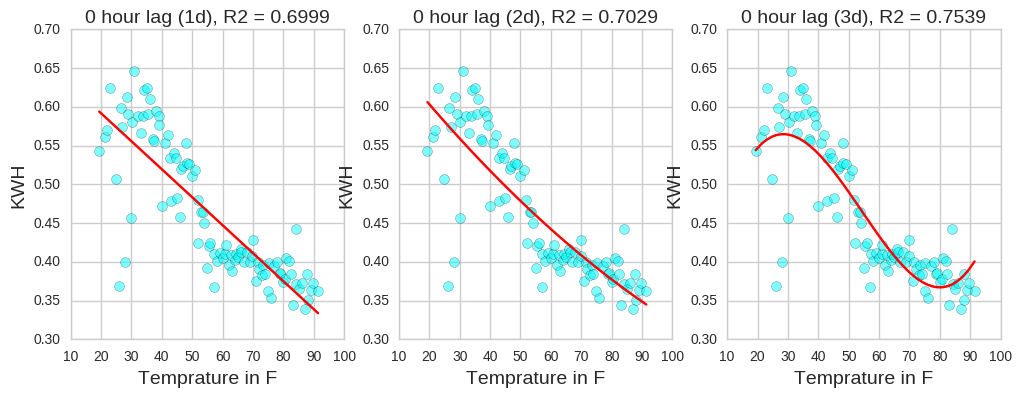

In [49]:
#running regression for no lag
p1 = smf.ols(formula = 'High_Income ~ Temperature_F', data = data2).fit()
p2 = smf.ols(formula = 'High_Income ~ np.power(Temperature_F, 2) + Temperature_F', data = data2).fit()
p3 = smf.ols(formula = 'High_Income ~ np.power(Temperature_F, 3) + np.power(Temperature_F, 2) + Temperature_F', data = data2).fit()
#saving r-squared values
rsqd['1deg_R2'][0] = p1.rsquared
rsqd['2deg_R2'][0] = p2.rsquared
rsqd['3deg_R2'][0] = p3.rsquared
rsqd['1deg_adjR2'][0] = p1.rsquared_adj
rsqd['2deg_adjR2'][0] = p2.rsquared_adj
rsqd['3deg_adjR2'][0] = p3.rsquared_adj
rsqd['LR12'][0] = str(p2.compare_lr_test(p1))
rsqd['LR13'][0] = str(p3.compare_lr_test(p1))

#ploting results
sns.set_style("whitegrid")
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='cyan',s=50, alpha=.5, ax=ax1)
ax1.plot(data2.Temperature_F, p1.predict(), color='r')
ax1.set_title('{0} hour lag (1d), R2 = {1}'.format( 0, round(p1.rsquared, 4)), fontsize=14)
ax1.set_ylabel("KWH", fontsize=14)
ax1.set_xlabel("Temprature in F", fontsize=14)
data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='cyan',s=50, alpha=.5, ax=ax2)
ax2.plot(data2.Temperature_F, p2.predict(), color='r')
ax2.set_title('{0} hour lag (2d), R2 = {1}'.format(0, round(p2.rsquared, 4)), fontsize=14)
ax2.set_ylabel("KWH", fontsize=14)
ax2.set_xlabel("Temprature in F", fontsize=14)
data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='cyan',s=50, alpha=.5, ax=ax3)
ax3.plot(data2.Temperature_F, p3.predict(), color='r')
ax3.set_title('{0} hour lag (3d), R2 = {1}'.format(0, round(p3.rsquared, 4)), fontsize=14)
ax3.set_ylabel("KWH", fontsize=14)
ax3.set_xlabel("Temprature in F", fontsize=14)

# lag analysis


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packa

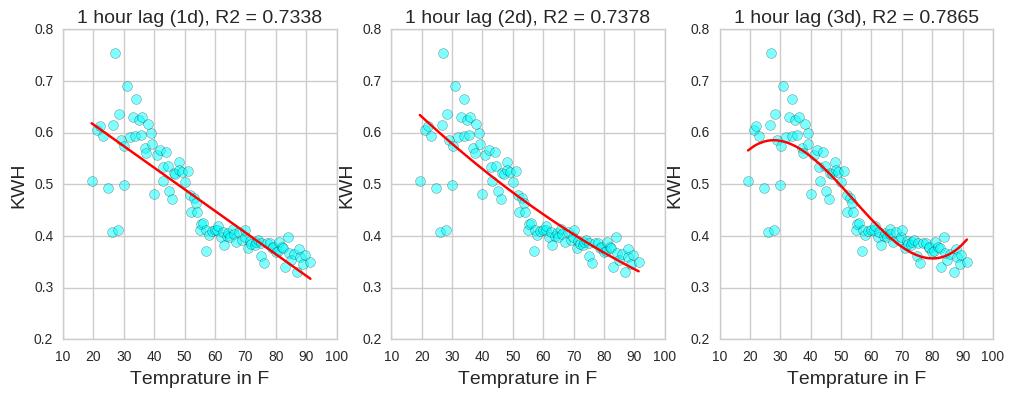

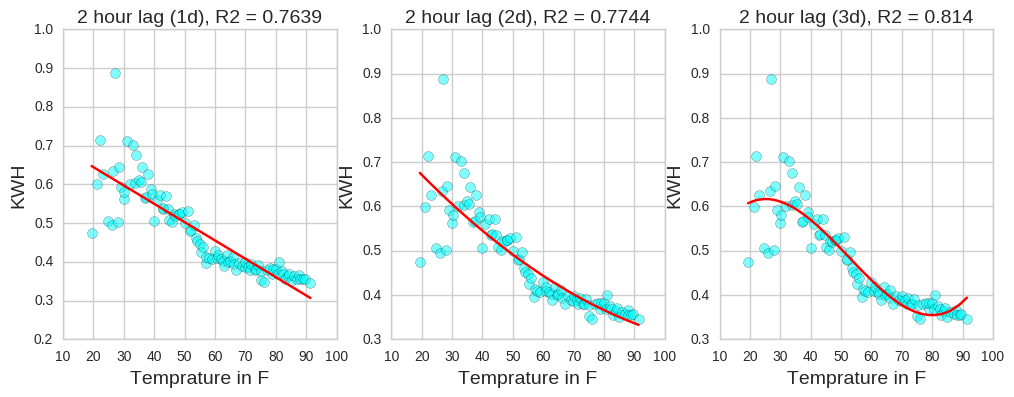

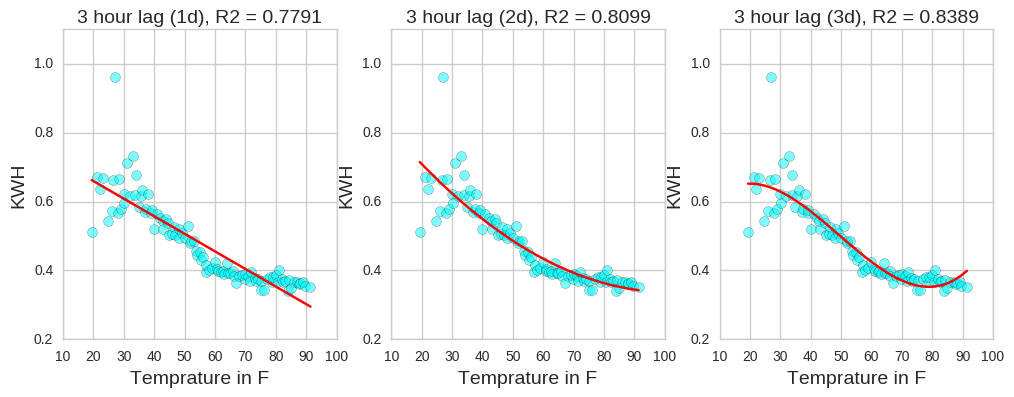

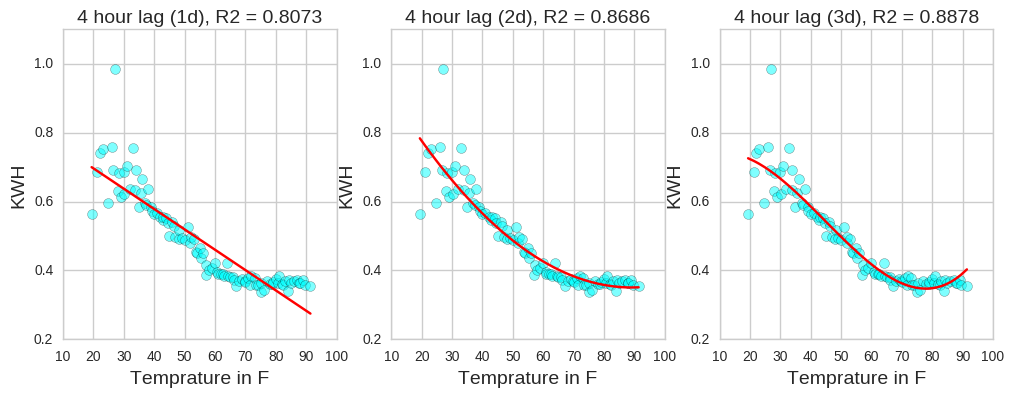

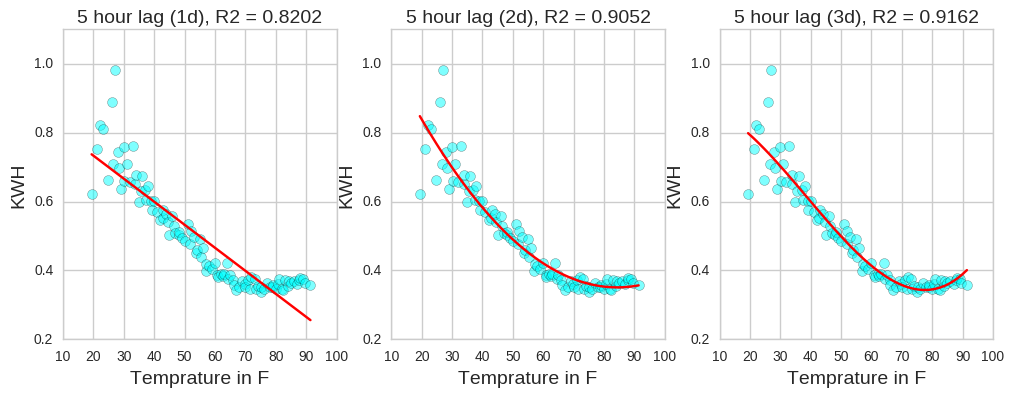

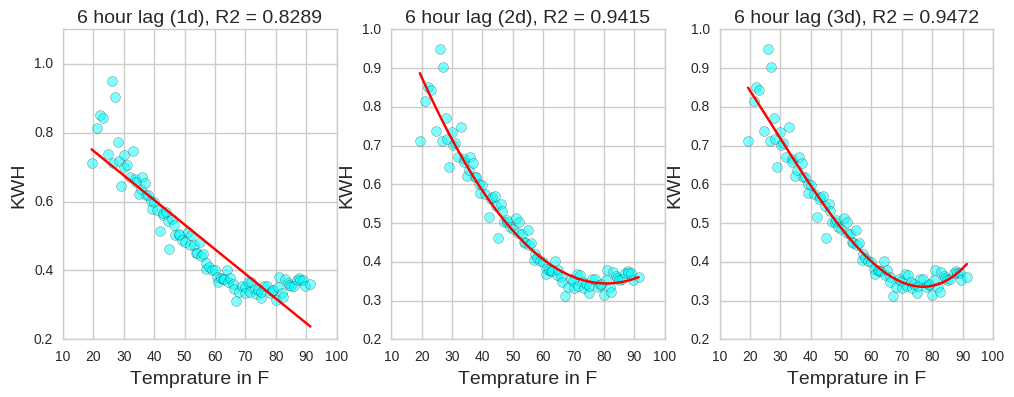

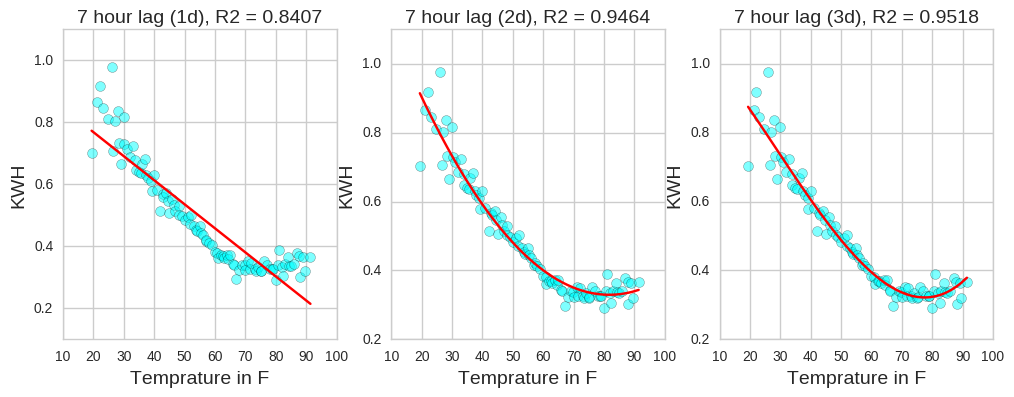

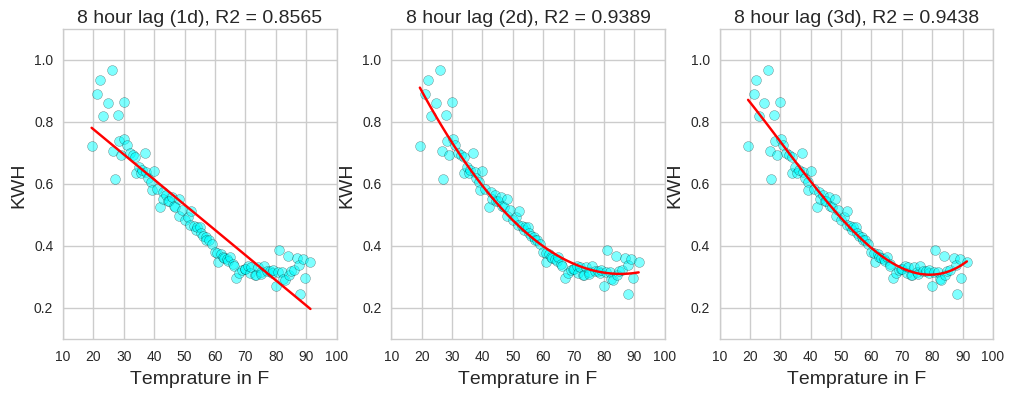

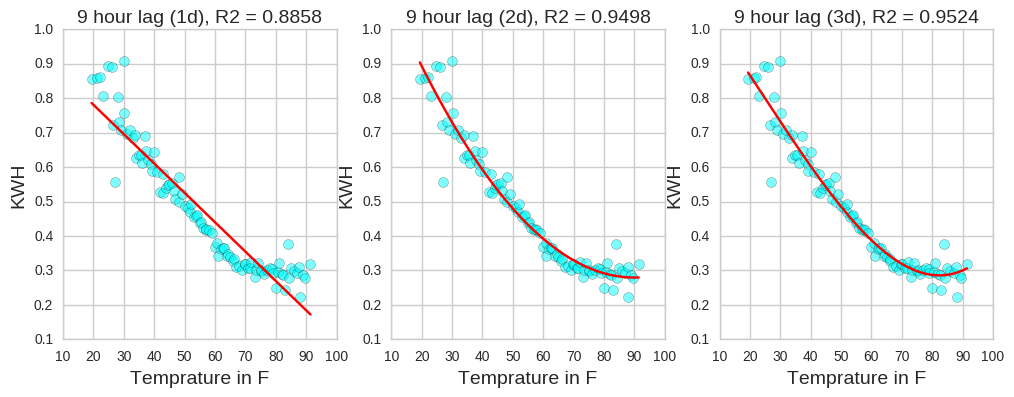

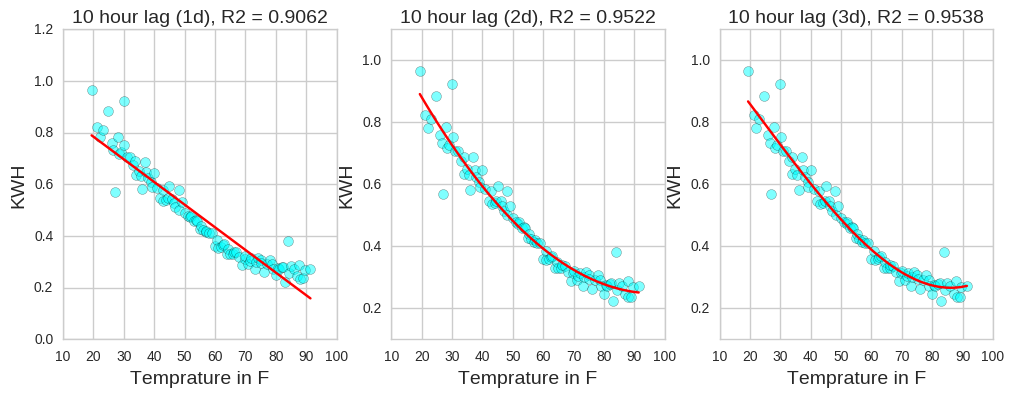

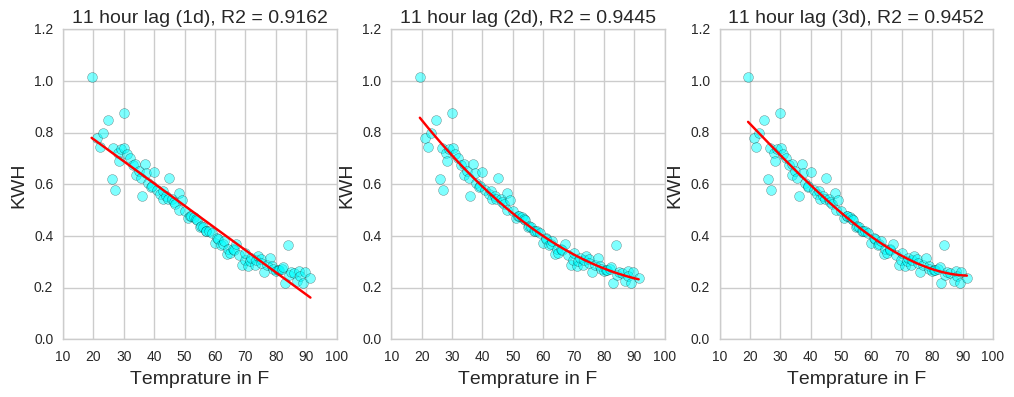

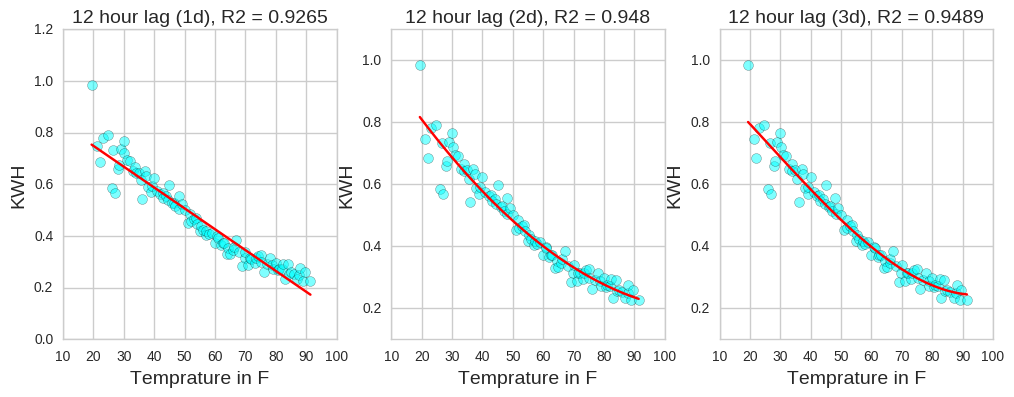

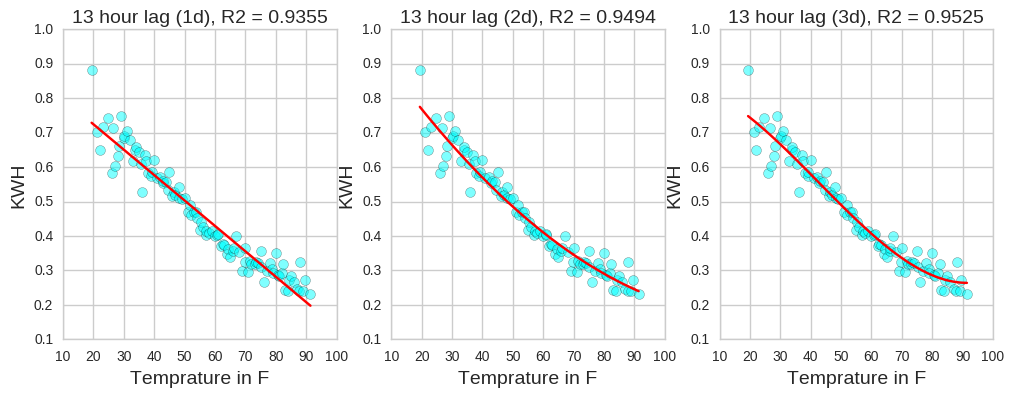

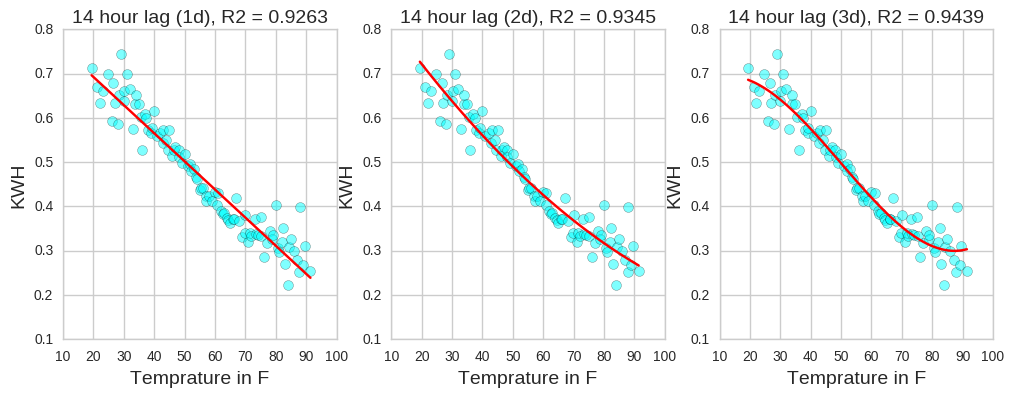

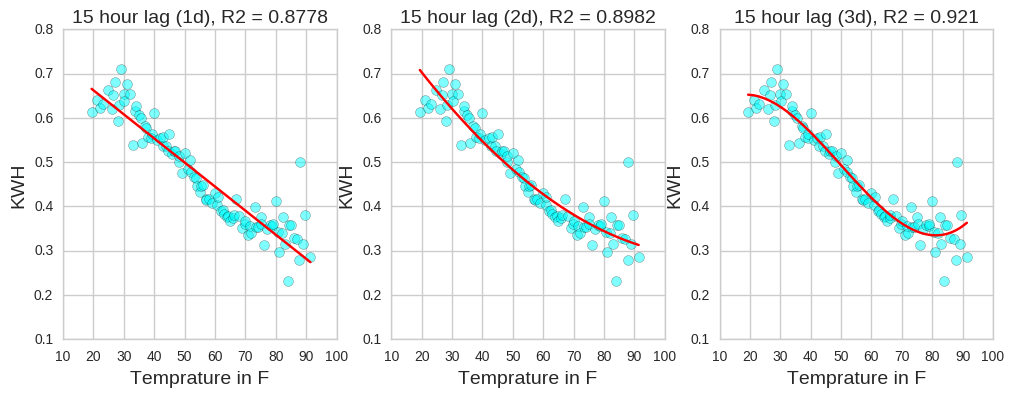

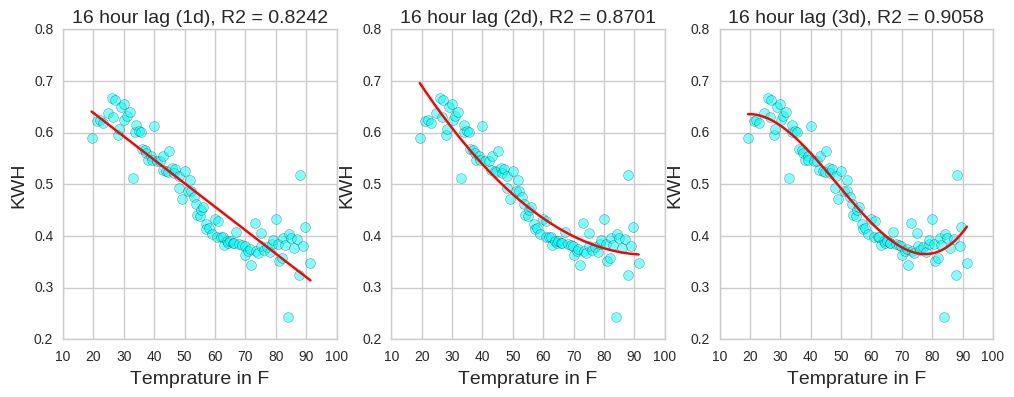

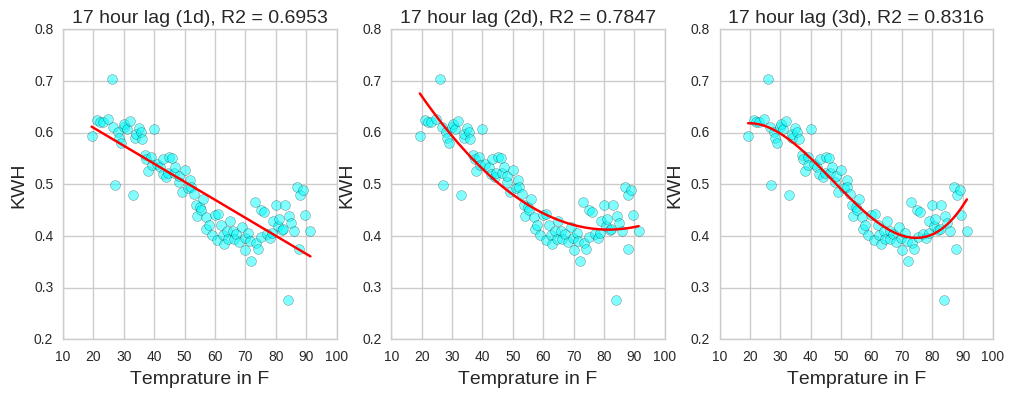

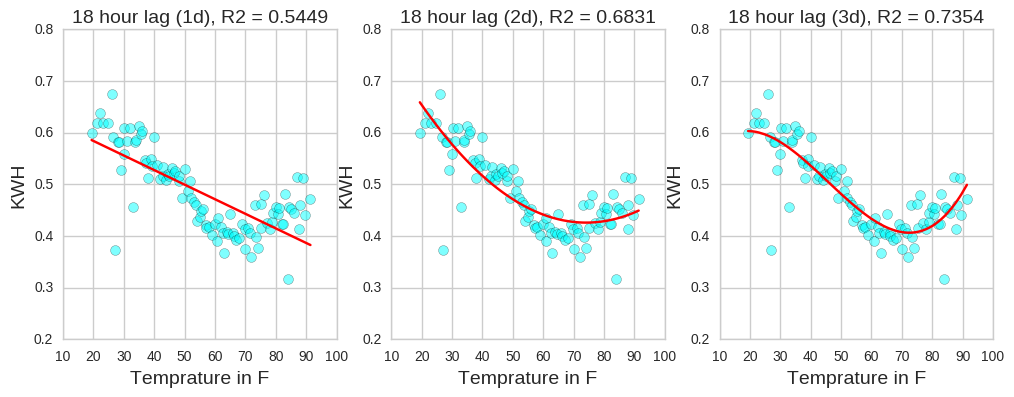

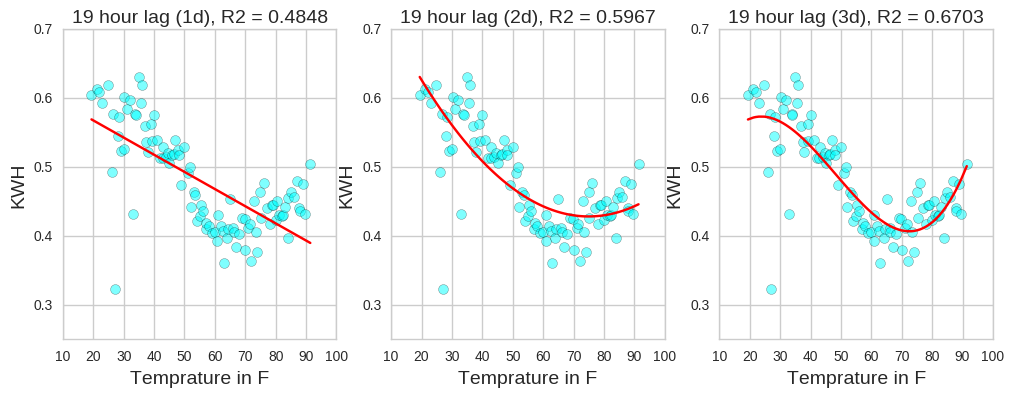

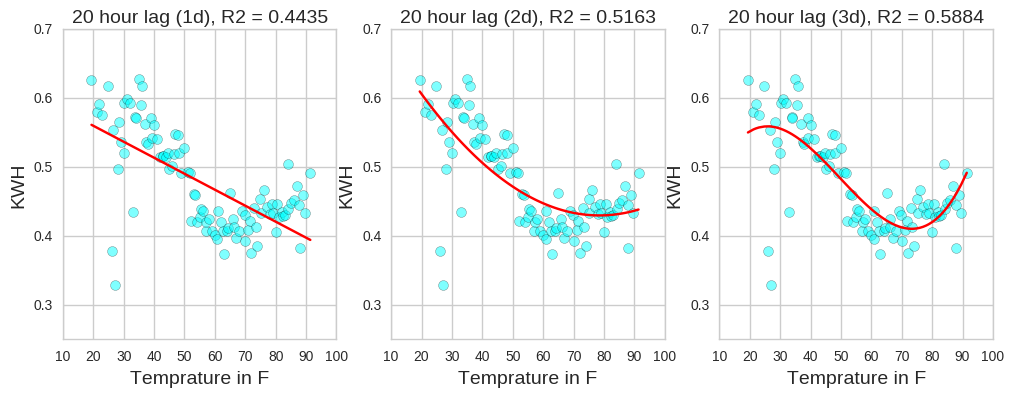

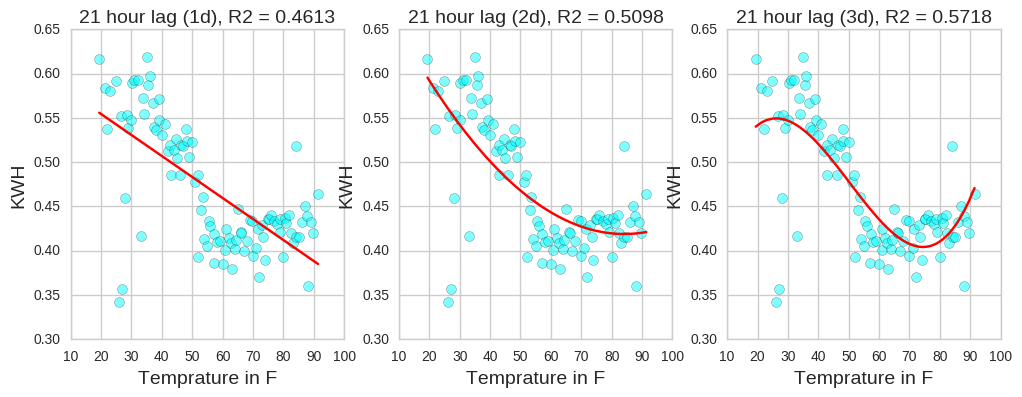

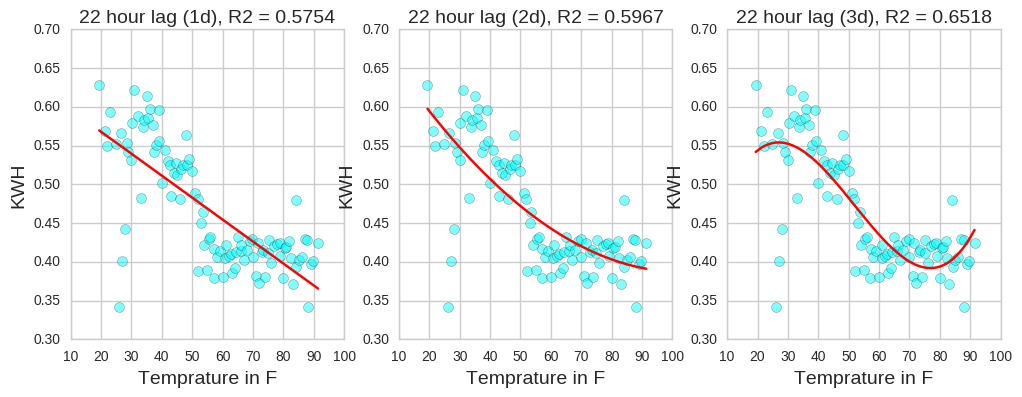

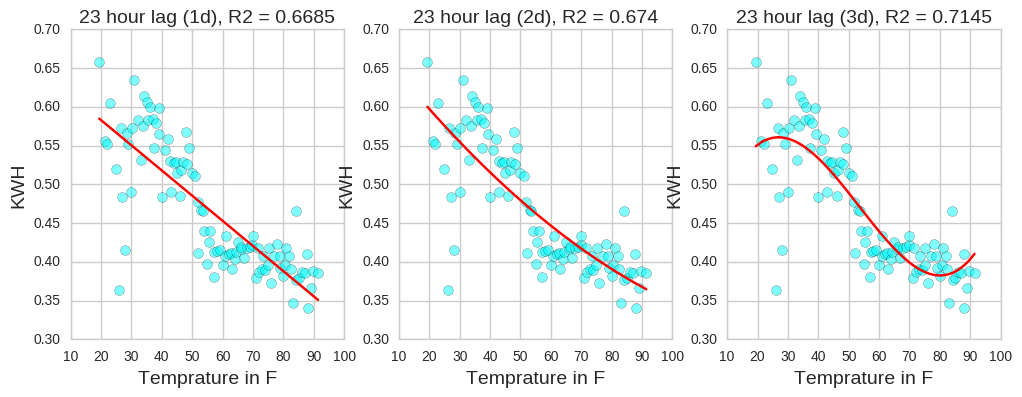

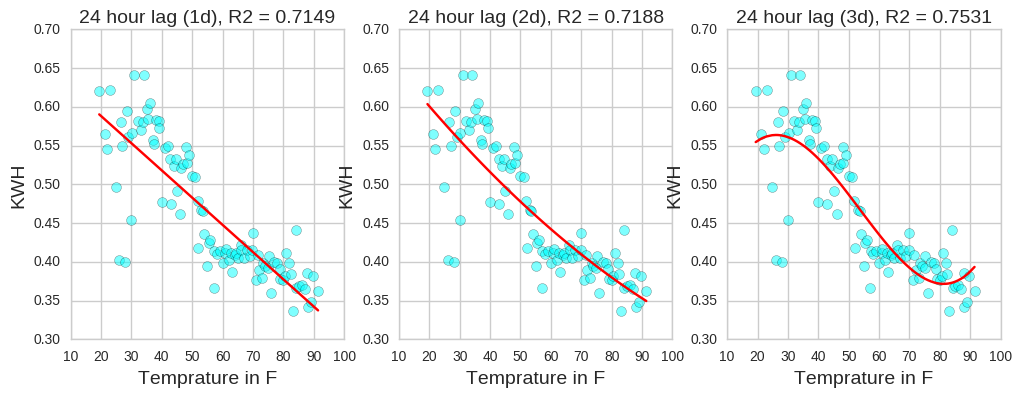

In [50]:
for i in range(1,25):
    #establishing the lag
    x = np.array(final1213.Temperature_F[i:])
    y1 = np.array(final1213.High_Income[:-i])
    timelag = pd.DataFrame()
    timelag['Temp'] = x
    timelag['Overall'] = y1
    #grouping by temperature
    lag_grp = timelag.groupby(['Temp']).mean()
    lag_grp.reset_index(inplace=True)
    #running regression
    p1 = smf.ols(formula = 'Overall ~ Temp', data = lag_grp).fit()
    p2 = smf.ols(formula = 'Overall ~ np.power(Temp, 2) + Temp', data = lag_grp).fit()
    p3 = smf.ols(formula = 'Overall ~ np.power(Temp, 3) + np.power(Temp, 2) + Temp', data = lag_grp).fit()
    #saving r-squared values
    rsqd['1deg_R2'][i] = p1.rsquared
    rsqd['2deg_R2'][i] = p2.rsquared
    rsqd['3deg_R2'][i] = p3.rsquared
    rsqd['1deg_adjR2'][i] = p1.rsquared_adj
    rsqd['2deg_adjR2'][i] = p2.rsquared_adj
    rsqd['3deg_adjR2'][i] = p3.rsquared_adj
    rsqd['LR12'][i] = str(p2.compare_lr_test(p1))
    rsqd['LR13'][i] = str(p3.compare_lr_test(p1))
    #ploting results
    sns.set_style("whitegrid")
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='cyan',s=50, alpha=.5, ax=ax1)
    ax1.plot(lag_grp.Temp, p1.predict(), color='r')
    ax1.set_title('{0} hour lag (1d), R2 = {1}'.format(i, round(p1.rsquared, 4)), fontsize=14)
    ax1.set_ylabel("KWH", fontsize=14)
    ax1.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='cyan',s=50, alpha=.5, ax=ax2)
    ax2.plot(lag_grp.Temp, p2.predict(), color='r')
    ax2.set_title('{0} hour lag (2d), R2 = {1}'.format(i, round(p2.rsquared, 4)), fontsize=14)
    ax2.set_ylabel("KWH", fontsize=14)
    ax2.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='cyan',s=50, alpha=.5, ax=ax3)
    ax3.plot(lag_grp.Temp, p3.predict(), color='r')
    ax3.set_title('{0} hour lag (3d), R2 = {1}'.format(i, round(p3.rsquared, 4)), fontsize=14)
    ax3.set_ylabel("KWH", fontsize=14)
    ax3.set_xlabel("Temprature in F", fontsize=14)

In [51]:
rsqd

,Time_Lag,1deg_R2,1deg_adjR2,2deg_R2,2deg_adjR2,3deg_R2,3deg_adjR2,LR12,LR13
0,0.0,0.699886,0.696792,0.702910,0.696720,0.753853,0.746080,"(1.0023933678247658, 0.31673207511764023, 1.0)","(19.625120347797179, 5.4759473410956069e-05, 2.0)"
1,1.0,0.733755,0.731010,0.737754,0.732291,0.786491,0.779749,"(1.4984407606231116, 0.22091143230665322, 1.0)","(21.853204258233518, 1.7973679339714476e-05, 2.0)"
2,2.0,0.763887,0.761453,0.774444,0.769744,0.813952,0.808077,"(4.5283179046414261, 0.033338371212961494, 1.0)","(23.592257144315226, 7.5336675811621259e-06, 2.0)"
3,3.0,0.779052,0.776774,0.809880,0.805919,0.838912,0.833825,"(14.877134737816391, 0.00011474544092821614, 1.0)","(31.28215012618216, 1.6112666162559519e-07, 2.0)"
4,4.0,0.807268,0.805282,0.868617,0.865880,0.887842,0.884301,"(37.935087949438525, 7.313795681834374e-10, 1.0)","(53.597976239530681, 2.2979857909047343e-12, 2.0)"
5,5.0,0.820237,0.818384,0.905162,0.903186,0.916200,0.913554,"(63.307198353998274, 1.7685682783335445e-15, 1.0)","(75.55729667726655, 3.916891060272898e-17, 2.0)"
6,6.0,0.828897,0.827133,0.941507,0.940288,0.947196,0.945529,"(106.26252001291277, 6.4586528039412387e-25, 1.0)","(116.39230108063543, 5.3178116648049307e-26, 2.0)"
7,7.0,0.840668,0.839026,0.946441,0.945325,0.951803,0.950281,"(107.93043790918136, 2.7837911701446217e-25, 1.0)","(118.37319060165885, 1.9750962217026684e-26, 2.0)"
8,8.0,0.856468,0.854988,0.938858,0.937585,0.943842,0.942069,"(84.483049866067176, 3.8752291598863462e-20, 1.0)","(92.901110225971252, 6.7108917438076773e-21, 2.0)"
9,9.0,0.885839,0.884663,0.949829,0.948783,0.952430,0.950928,"(81.393876920077673, 1.8493001898189657e-19, 1.0)","(86.665425895006365, 1.5164981365823426e-19, 2.0)"


# 9 hour lag and 3rd degree polyfit has the best R-squared (0.952430), R-squared_adj (0.950928), LR (5.2715489749286917, 0.021676715954565957, 1.0)

# Suck it Victors :P

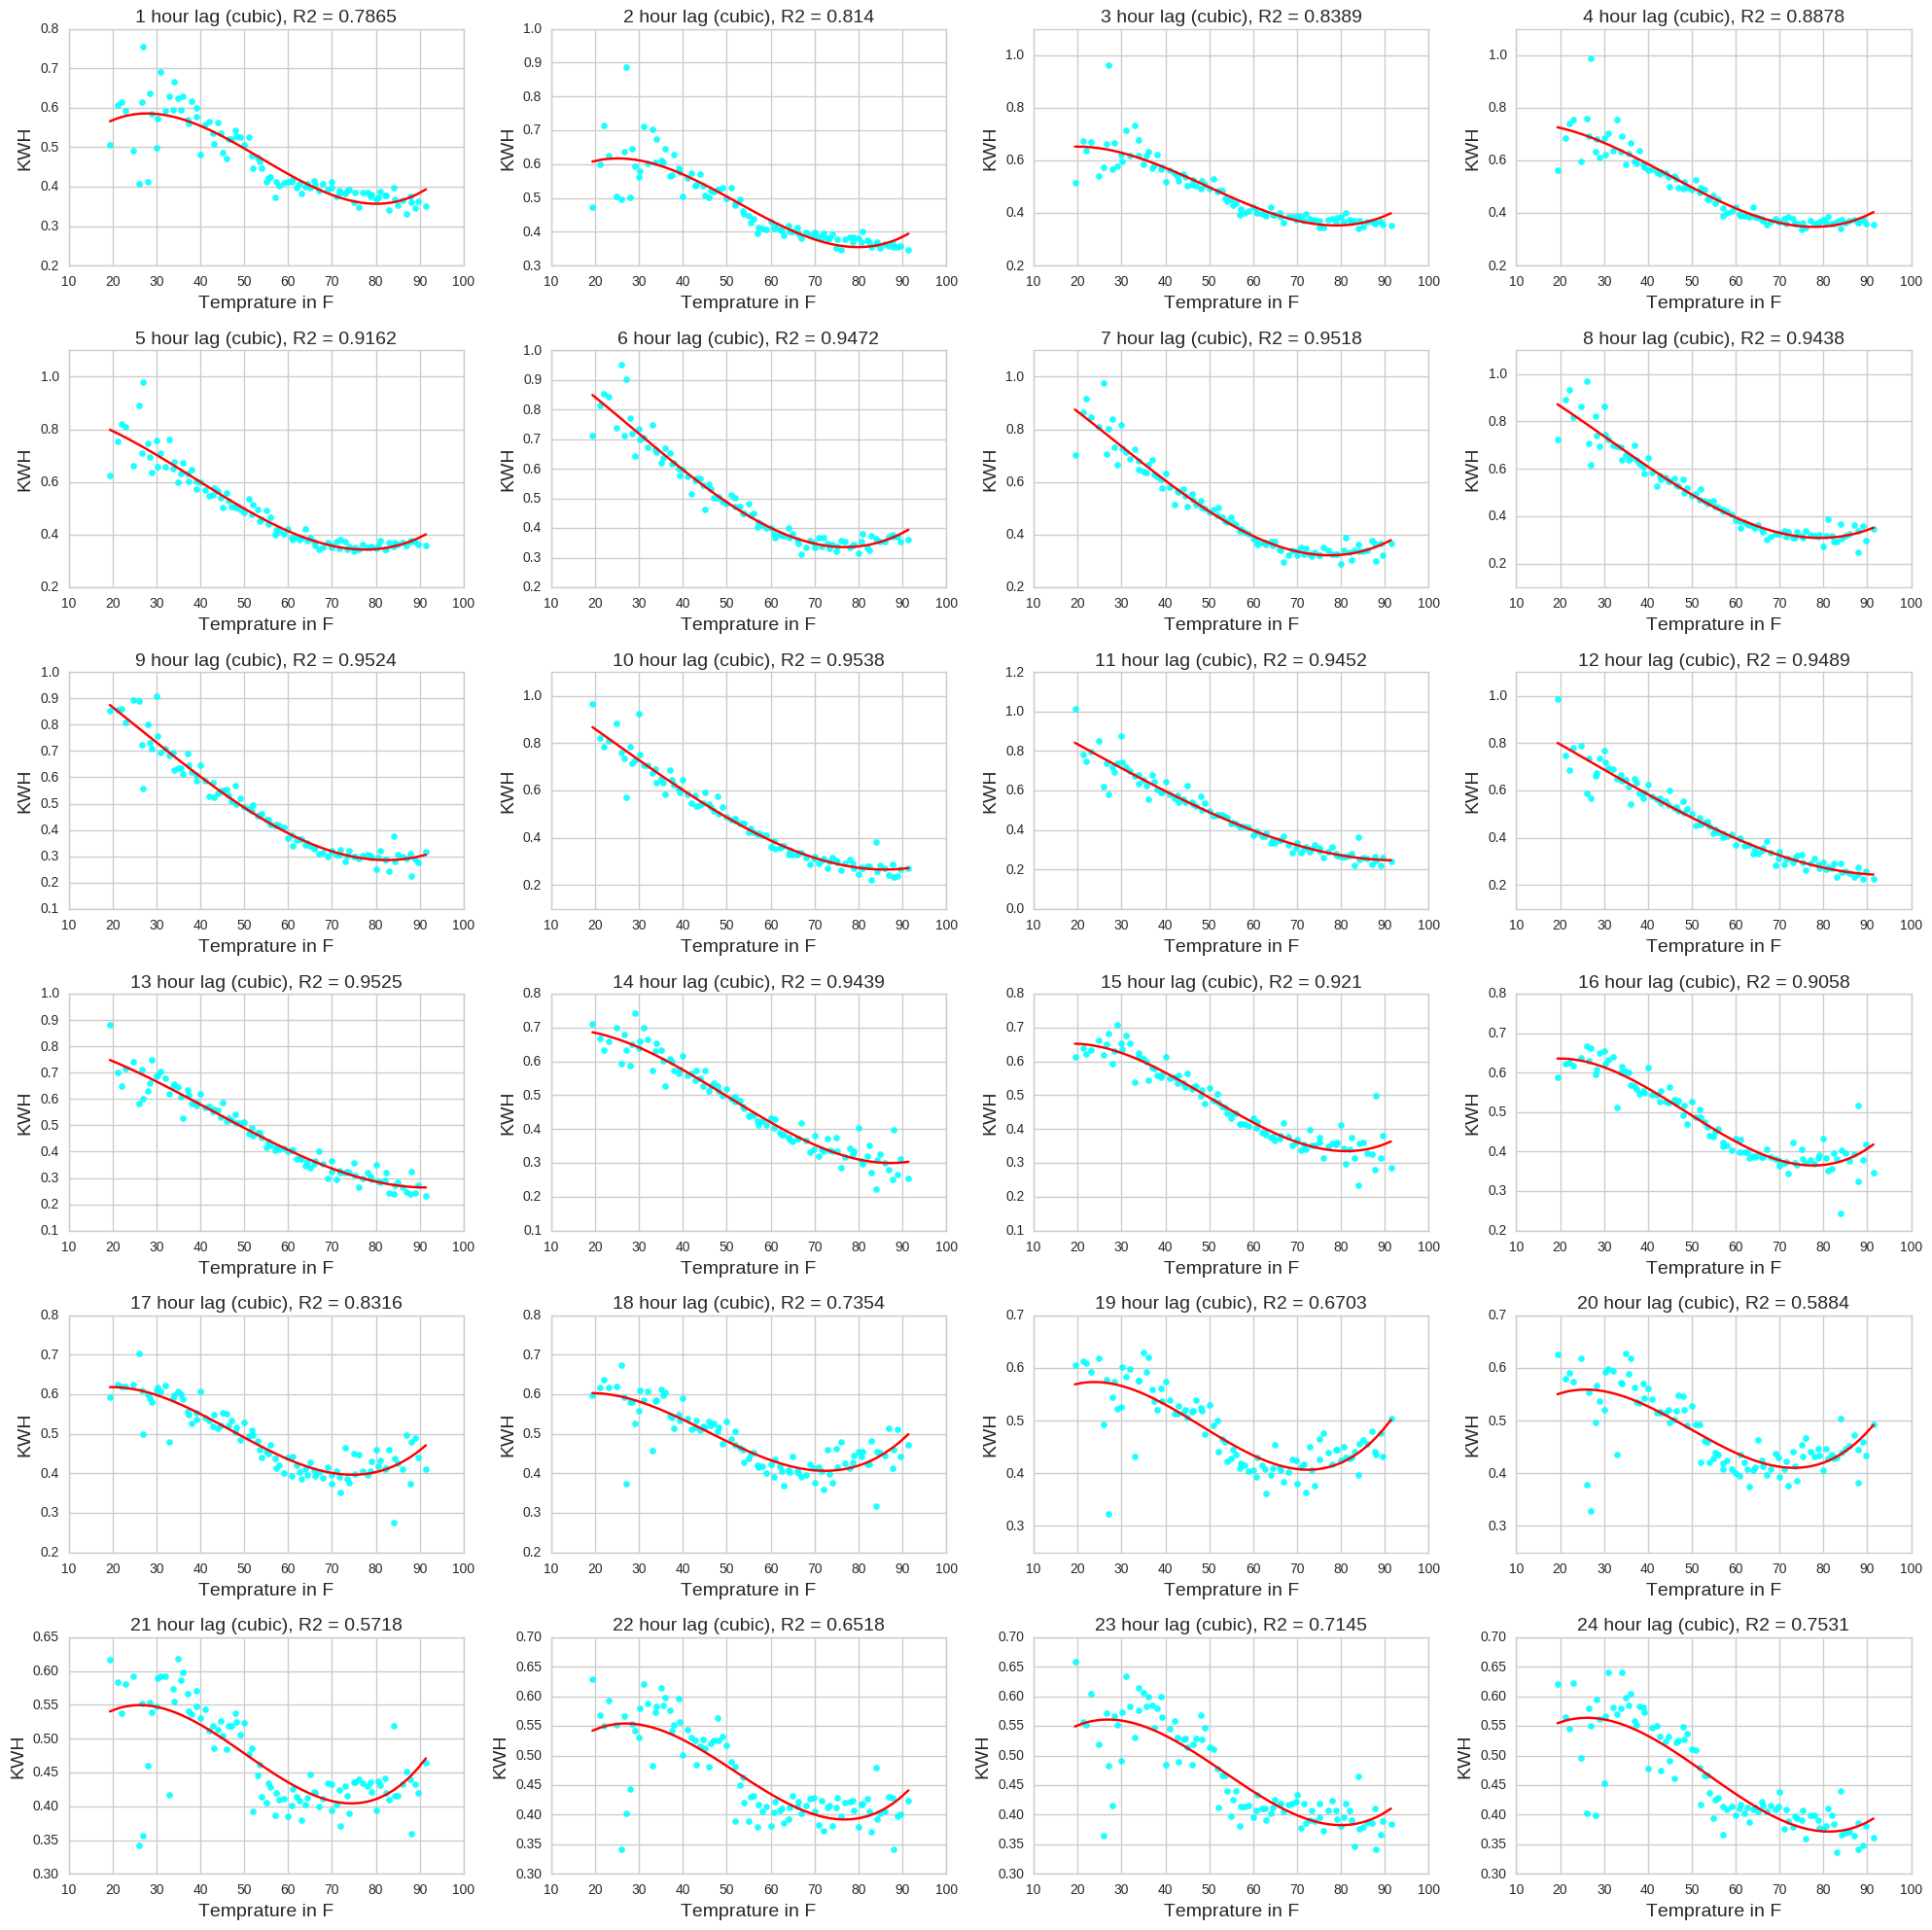

In [52]:
fig = pl.figure(figsize=(20,20))
for i in range(1,25):
    #establishing the lag
    x = np.array(final1213.Temperature_F[i:])
    y1 = np.array(final1213.High_Income[:-i])
    timelag = pd.DataFrame()
    timelag['Temp'] = x
    timelag['Overall'] = y1
    #grouping by temperature
    lag_grp = timelag.groupby(['Temp']).mean()
    lag_grp.reset_index(inplace=True)
    #running regression
    p1 = smf.ols(formula = 'Overall ~ np.power(Temp, 3) + np.power(Temp, 2) + Temp', data = lag_grp).fit()
    #ploting results
    sns.set_style("whitegrid")
    pl.subplot(6,4,i)
    pl.scatter(lag_grp['Temp'], lag_grp['Overall'], color='cyan', alpha=.9)
    pl.plot(lag_grp.Temp, p1.predict(), color='r')
    pl.title('{0} hour lag (cubic), R2 = {1}'.format(i, round(p1.rsquared, 4)), fontsize=14)
    pl.ylabel("KWH", fontsize=14)
    pl.xlabel("Temprature in F", fontsize=14)
    
pl.tight_layout()
pl.show()

In [53]:
rsqd.to_csv('../Final_Data/Lag_Analysis_High')